In [1]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Loading the dataset & viewing what's inside by applying EDA
data = pd.read_csv("C:/Users/CAU Student/Downloads/Maternal-and-Newborn-Health-Coverage-Database-Dec-2022.csv", delimiter=";")

In [3]:
print(data.head())

   ISO Countries and areas UNICEF Reporting Region UNICEF Programme Region  \
0  AFG         Afghanistan              South Asia                    ROSA   
1  AFG         Afghanistan              South Asia                    ROSA   
2  AFG         Afghanistan              South Asia                    ROSA   
3  AFG         Afghanistan              South Asia                    ROSA   
4  AFG         Afghanistan              South Asia                    ROSA   

  World Bank Income Group (2020)  Year    Short Source  \
0                     Low income  2010        AMS 2010   
1                     Low income  2011  MICS 2010-2011   
2                     Low income  2014   Other NS 2014   
3                     Low income  2015        DHS 2015   
4                     Low income  2017  ALCS 2016-2017   

                                         Long Source National Rural Urban  \
0                  Afghanistan Mortality Survey 2010     16,1    12  33,6   
1        Multiple Indicator 

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   ISO                             479 non-null    object
 1   Countries and areas             479 non-null    object
 2   UNICEF Reporting Region         479 non-null    object
 3   UNICEF Programme Region         479 non-null    object
 4   World Bank Income Group (2020)  479 non-null    object
 5   Year                            479 non-null    int64 
 6   Short Source                    479 non-null    object
 7   Long Source                     479 non-null    object
 8   National                        478 non-null    object
 9   Rural                           369 non-null    object
 10  Urban                           370 non-null    object
 11  Poorest                         257 non-null    object
 12  Second                          256 non-null    ob

In [5]:
# loading the basic statistics for each column to understand the distribution and central tendencies of the numeric columns
print(data.describe())

              Year
count   479.000000
mean   2011.382046
std       5.429866
min    2000.000000
25%    2007.000000
50%    2012.000000
75%    2016.000000
max    2021.000000


In [ ]:
#Data Preprocessing:

# 1. Handle missing values (if any).
# 2. Convert categorical data into numeric form using encoding techniques like one-hot encoding or label encoding.
# 3. Normalize or standardize the features if necessary.

In [6]:
#1. Handle Missing Values

# Check for missing values
print(data.isnull().sum())

ISO                                 0
Countries and areas                 0
UNICEF Reporting Region             0
UNICEF Programme Region             0
World Bank Income Group (2020)      0
Year                                0
Short Source                        0
Long Source                         0
National                            1
Rural                             110
Urban                             109
Poorest                           222
Second                            223
Middle                            223
Fourth                            223
Richest                           223
15-19                             157
dtype: int64


In [7]:
# Method 1 is to remove rows with missing values
#data.dropna(inplace=True) #Decided not to use this because:
#Potential Loss of Data: There are many rows have at least one missing value, I would be removing a significant portion from the dataset.
#Bias: The missing values are not random from what I've noticed, a certain group of people seems to have missing data, by removing these rows I could potentially introduce bias. Which I'm trying to avoid

# I decided to go with Method 2 : fill the missing values with a mean for numeric columns
for column in ['National','Rural', 'Urban', 'Poorest', 'Second', 'Middle', 'Fourth', 'Richest', '15-19']:
    data[column].fillna(data[column].mean(), inplace=True)

TypeError: can only concatenate str (not "int") to str

In [8]:
#To fix the error above, I have to check the data types of the columns to see if they are being read as numeric or string
print(data[['National','Rural', 'Urban', 'Poorest', 'Second', 'Middle', 'Fourth', 'Richest', '15-19']].dtypes)

National    object
Rural       object
Urban       object
Poorest     object
Second      object
Middle      object
Fourth      object
Richest     object
15-19       object
dtype: object


In [9]:
#Since they're all being read as an object which denotes a string in pandas, I have to convert them to numeric
for column in ['National','Rural', 'Urban', 'Poorest', 'Second', 'Middle', 'Fourth', 'Richest', '15-19']:
    data[column] = pd.to_numeric(data[column], errors='coerce')

In [10]:
#Now I can fill NaN values with the mean without getting the TypeError

for column in ['National','Rural', 'Urban', 'Poorest', 'Second', 'Middle', 'Fourth', 'Richest', '15-19']:
    data[column].fillna(data[column].mean(), inplace=True)

In [11]:
#2. Convert Categorical Data into Numeric Form
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#One-Hot Encoding
one_hot_columns = ['ISO', 'Countries and areas', 'UNICEF Reporting Region', 'UNICEF Programme Region', 'Short Source', 'Long Source', 'Year']
data = pd.get_dummies(data, columns=one_hot_columns, drop_first=True)  # drop_first avoids multicollinearity

In [12]:
#Label Encoding
#For columns like World Bank Income Group (2020) which have an inherent order (e.g., Low Income < Middle Income < High Income):

label_encoder = LabelEncoder()
data['World Bank Income Group (2020)'] = label_encoder.fit_transform(data['World Bank Income Group (2020)'])

In [13]:
#3. Standardize the Features:
#Standardization: Rescale features to have mean=0 and variance=1.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
columns_to_scale = ['National', 'Rural', 'Urban', 'Poorest', 'Second', 'Middle', 'Fourth', 'Richest', '15-19']  
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

In [14]:
#Splitting the data
from sklearn.model_selection import train_test_split

X = data.drop('National', axis=1)  # Remove target column to form feature matrix
y = data['National']  # Target column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.linear_model import LinearRegression  # Since it's a regression task

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R^2:", r2_score(y_test, y_pred))

MAE: 20177797352.808956
MSE: 8.237561143921183e+21
R^2: -7.125872951232752e+21


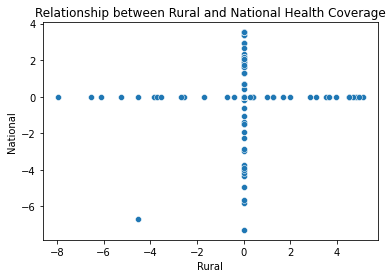

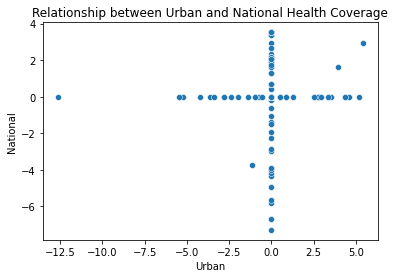

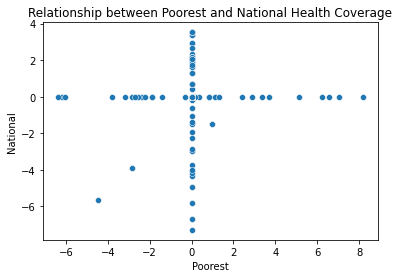

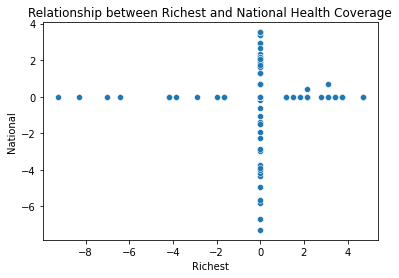

In [17]:
#Applying EDA using bivariate analysis
#Here's my thought process, I've established 'National' as the target variable, which represents the national health coverage.
# I then looked at relationships between 'National' and a few other variables such as 'Rural', 'Urban', 'Poorest', 'Richest', and 'UNICEF Reporting Region'.

#1. Numeric vs Numeric. I am examining the relationship between 'National' health coverage and other numeric variables like 'Rural', 'Urban', 'Poorest', and 'Richest'.

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is loaded as 'data'
numeric_cols = ['Rural', 'Urban', 'Poorest', 'Richest']

for col in numeric_cols:
    sns.scatterplot(x=data[col], y=data['National'])
    plt.title(f'Relationship between {col} and National Health Coverage')
    plt.show()
    
#The goal of this plot is to visualise if there are any clear linear relationships between the target variable and other numeric predictors.

In [18]:
print(data.head()) #Only numerical columns currently becuase of the encoding

   World Bank Income Group (2020)  National         Rural  Urban  Poorest  \
0                               1       0.0 -6.534685e+00    0.0      0.0   
1                               1       0.0  3.026163e-15    0.0      0.0   
2                               1       0.0  3.026163e-15    0.0      0.0   
3                               1       0.0  3.026163e-15    0.0      0.0   
4                               1       0.0  3.026163e-15    0.0      0.0   

         Second  Middle     Fourth       Richest         15-19  ...  \
0  3.645897e-15     0.0   0.000000 -9.005840e-15  1.427272e-15  ...   
1  3.645897e-15     0.0 -12.503954 -9.005840e-15  1.427272e-15  ...   
2  3.645897e-15     0.0   0.000000 -9.005840e-15  1.427272e-15  ...   
3  3.645897e-15     0.0   0.000000 -9.005840e-15  1.427272e-15  ...   
4  3.645897e-15     0.0   0.000000 -9.005840e-15  1.427272e-15  ...   

   Year_2012  Year_2013  Year_2014  Year_2015  Year_2016  Year_2017  \
0          0          0          0     

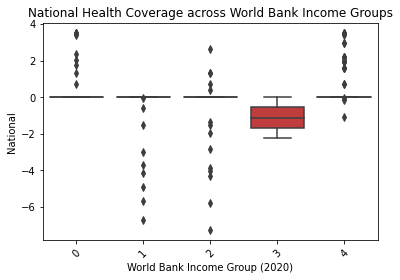

In [19]:
#2. Numeric vs Categorical 
#I looked at comparing the 'National' health coverage based on income groups ('World Bank Income Group (2020)').

sns.boxplot(x=data['World Bank Income Group (2020)'], y=data['National'])
plt.xticks(rotation=45)  # Rotating x-axis labels for clarity
plt.title('National Health Coverage across World Bank Income Groups')
plt.show()


#The goal here is to show how the 'National' health coverage varies across different income groups.
#It gives insights into whether higher income groups tend to have better health coverage or not.

In [ ]:
#Some interesting points.
#Central Tendency:
#Median: The horizontal line inside each box represents the median of the 'National' health coverage for that specific income group. It gives you a central value of the data distribution for each group.

#Variability:
#Interquartile Range (IQR): The box's length represents the IQR, which is the range between the 25th percentile (Q1, lower hinge of the box) and the 75th percentile (Q3, upper hinge of the box) of the data. A larger box indicates higher variability in health coverage within that income group, while a smaller box indicates lesser variability.
#Whiskers: These are the lines that extend from the box's top and bottom. They show the overall range of the data, indicating the minimum and maximum values within 1.5 times the IQR. Data points outside the whiskers are often considered outliers.

#Outliers:
#Points outside the Whiskers: These are individual data points that fall below (Q1 - 1.5IQR) or above (Q3 + 1.5IQR). They represent countries that have exceptionally low or high 'National' health coverage compared to others in the same income group.

#Comparisons:
#By placing the boxes of different income groups side by side, you can compare the health coverage distributions. For instance, if the median health coverage of "High income" countries is notably higher than that of "Low income" countries, it suggests that richer countries tend to have better national health coverage.
#The spread of the boxes will also indicate which income groups have consistent health coverage across countries and which groups have countries with highly variable health coverages.

#Potential Trends or Patterns:
#For example, you might see a general trend where higher income groups tend to have both higher median health coverage and less variability. Or, there might be some surprising insights, like a middle-income group having a wider range of health coverages than others.

In [20]:
#Splitting the data 
from sklearn.model_selection import train_test_split

X = data.drop('National', axis=1)  # predictors; 'National' is the target
y = data['National']  # target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
#Train the logistic regression model using the training data 
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

ValueError: Unknown label type: 'continuous'

In [ ]:
#Model evaulation
#Evaluate the model's performance on the test set:

#Predictions: Use the model to predict on the test set.

#Accuracy: Calculate how often the model predicts the correct class.

#Confusion Matrix: Show true positives, true negatives, false positives, and false negatives.

#Other Metrics: Depending on the problem, you might also consider precision, recall, the F1-score, and the ROC-AUC score.

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")

AttributeError: 'LogisticRegression' object has no attribute 'coef_'

In [26]:
#Improving the model
#I used hyperparameter tuning , specifically Grid Search to be able to train the model on every combination of hyperparameters in a predefined grid, then evaluating which combination works best.
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
log_reg = LogisticRegression()
grid_search = GridSearchCV(log_reg, parameters, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)

C:\Users\CAU Student\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
35 fits failed out of a total of 35.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\CAU Student\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\CAU Student\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1516, in fit
    check_classification_targets(y)
  File "C:\Users\CAU Student\AppData\Local\Programs\Python\Py

ValueError: Unknown label type: 'continuous'